Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT license. (c) 2017 David Phelps

# Plain Flap Angle Analysis in XFLR/Course Panel Method

# Introduction

In this project we will create plain flaps on pre-existing airfoils using XFLR then compare XFLR's lift analysis and our courses panel method lift analysis. Before diving into how to alter airfoils to create flaps we will start by discussing the importance of flaps in modern aviation. <br />

**Why do we use flaps?** 

Flaps as we learned in our last assignment allow for aircraft to delay stall speeds effectively allowing aircraft to maintain lift at lower speeds. You migh ask why is this useful in practice? These lower speeds allow for steeper shorter landing runways by approaching the runway at a lower speed to shorten the distance required to stop the aircraft. You are also able to come in at a steeper angle of decent. Flaps are also useful on takeoff, by achieving higher lift values are lower speeds you can achieve takeoff on a shorter runway. The only downside to flaps is that they increase the drag over the airfoil which is why flaps are returned to a neutral location when the increased lift is not required.


**What we seek to accomplish in this notebook**
* Alter NACA 0012 Airfoil to create plain flap at various angles of deflections
* Run XFLR analysis tools to calculate lift for various angles of deflection
* Export and Import dat files into this notebook and calculate the lift of these new airfoils
* Compare and contrast the results 

# XFLR - Airfoil Creation/Alteration

In this section I will outline the procedure for importing and altering an airfoil to create a plain flap using XFLR.

This Process is a remarkable simple using XFLR5. Below you will find a step by step instructions on how to download, install, and run XFLR5 followed by how to import a base airfoil and then how to add leading edge and trailing edge flaps to that airfoil.

### Installing XFLR5 
* Go to http://www.xflr5.com/xflr5.htm and click on downloads.
* Download the newest version
* Also, Download if using windows you must have Visual C++ installed on your machine. This can be found on microsoft's website https://support.microsoft.com/en-us/help/2977003/the-latest-supported-visual-c-downloads
* Once XLFR has been downloaded extract the zip folder
* To run XFLR open the newly unziped docoment and run the .exe file

### Importing and Altering an Airfoil 
* Airfoils .dat files can be found at https://m-selig.ae.illinois.edu/ads/coord_database.html
* Once you have a .dat file you would like to alter and have XFLR running 
* Click file from the toolbar and then select Direct Foil Design
* Now Click File and select open and select the .dat file to be altered this will load in the .dat file
* You will see the airfoil geometery in the top most window and see its parameters listed in the bottom frame. 
* Right click the parameters and select Flap
* A new window will have opened this will allow you to add a Leading Edge or Trailing Edge flap with a specificed angle of deflection 
* To export again click file and then export and choose a new name for your airfoil

# XFLR - Airfoil Lift Analysis

In this section I will outline how to do lift analysis for our new airfoils using XFLR. I will explain how to start a single airfoil analysis, how to run a multi airfoil batch analysis and finally how to export your plots as txt files then do post processing in python or another editor.

* Open the desired Airfoil dat file in XFLR </br>
* Next select direct analysis form the file menu 
* Next Select Analysis/Define Analysis 
* No need to change any setting here
* Finally use the pop up menu to run the analysis with your desired parameters
* Now you should have your plots the one we are interested in today CL vs Angle of Attack
* Right clickt the plot you are interested in and click current graph/export

# MAE6226 - Airfoil Lift Analysis

In this section we will go through lift analysis using the panel method we learned in class. This portion of the project is very similar to lesson 11.

In [2]:
import os
import numpy
import csv
from scipy import integrate, linalg
from matplotlib import pyplot
from matplotlib import image
%matplotlib inline

Importing our 10 airfoils.

In [3]:
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012.dat')
with open(naca_filepath, 'r') as infile:
    x_base, y_base = numpy.loadtxt(infile, dtype=float, unpack=True)
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_TE_5.dat')
with open(naca_filepath, 'r') as infile:
    x_TE_5, y_TE_5 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_TE_10.dat')
with open(naca_filepath, 'r') as infile:
    x_TE_10, y_TE_10 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True) 
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_TE_15.dat')
with open(naca_filepath, 'r') as infile:
    x_TE_15, y_TE_15 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)  
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_TE_20.dat')
with open(naca_filepath, 'r') as infile:
    x_TE_20, y_TE_20 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)  
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_TE_25.dat')
with open(naca_filepath, 'r') as infile:
    x_TE_25, y_TE_25 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)   

naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_LE_5.dat')
with open(naca_filepath, 'r') as infile:
    x_LE_5, y_LE_5 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_LE_10.dat')
with open(naca_filepath, 'r') as infile:
    x_LE_10, y_LE_10 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_LE_15.dat')
with open(naca_filepath, 'r') as infile:
    x_LE_15, y_LE_15 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_LE_20.dat')
with open(naca_filepath, 'r') as infile:
    x_LE_20, y_LE_20 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)
    
naca_filepath = os.path.join('NACA0012_LE_TE_Angle', 'naca0012_LE_25.dat')
with open(naca_filepath, 'r') as infile:
    x_LE_25, y_LE_25 = numpy.loadtxt(infile, dtype=float, skiprows = 1, unpack=True)

Just so we understand what the airfoils look like

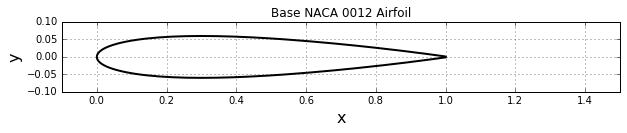

In [26]:
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_base, y_base, color='k', linestyle='-', linewidth=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-.1, 1.5);
pyplot.ylim(-.1, .1);
pyplot.title('Base NACA 0012 Airfoil')

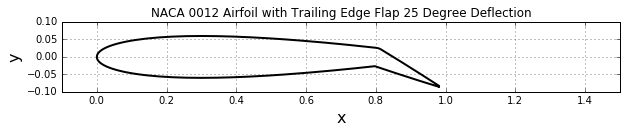

In [24]:
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_TE_25, y_TE_25, color='k', linestyle='-', linewidth=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-.1, 1.5);
pyplot.ylim(-.1, .1);
pyplot.title('NACA 0012 Airfoil with Trailing Edge Flap 25 Degree Deflection')

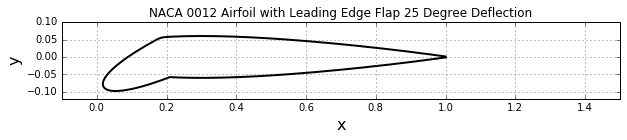

In [25]:
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_LE_25, y_LE_25, color='k', linestyle='-', linewidth=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-.1, 1.5);
pyplot.ylim(-.12, .1);
pyplot.title('NACA 0012 Airfoil with Leading Edge Flap 25 Degree Deflection')

Using the functions from lesson11 we will calculate the Coefficent of Lift as a function Angle of Attack

In [4]:
class Panel:
    """
    Contains information related to a panel.
    """
    def __init__(self, xa, ya, xb, yb):
        """
        Initializes the panel.
        
        Sets the end-points and calculates the center-point, length,
        and angle (with the x-axis) of the panel.
        Defines if the panel is located on the upper or lower surface of the geometry.
        Initializes the source-strength, tangential velocity, and pressure coefficient
        of the panel to zero.
        
        Parameters
        ---------_
        xa: float
            x-coordinate of the first end-point.
        ya: float
            y-coordinate of the first end-point.
        xb: float
            x-coordinate of the second end-point.
        yb: float
            y-coordinate of the second end-point.
        """
        self.xa, self.ya = xa, ya # panel starting-point
        self.xb, self.yb = xb, yb # panel ending-point
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2         # panel center
        self.length = numpy.sqrt((xb-xa)**2+(yb-ya)**2) # panel length
        
        # orientation of panel (angle between x-axis and panel's normal)
        if xb-xa <= 0.0:
            self.beta = numpy.arccos((yb-ya)/self.length)
        elif xb-xa > 0.0:
            self.beta = numpy.pi + numpy.arccos(-(yb-ya)/self.length)
        
        # panel location
        if self.beta <= numpy.pi:
            self.loc = 'upper' # upper surface
        else:
            self.loc = 'lower' # lower surface
        
        self.sigma = 0.0 # source strength
        self.vt = 0.0    # tangential velocity
        self.cp = 0.0    # pressure coefficient
        
def define_panels(x, y):
    """
    Discretizes the geometry into panels eveningly over the surface of the geometery 
    
    Parameters
    ----------
    x: 1D array of floats
        x-coordinate of the points defining the geometry.
    y: 1D array of floats
        y-coordinate of the points defining the geometry.
    
    Returns
    -------
    panels: 1D Numpy array of Panel objects.
        The list of panels.
    """
    
    # create panels
    N = x.size-1
    panels = numpy.empty(N, dtype=object)
    

    
    for i in range(N):
        panels[i] = Panel(x[i], y[i], x[i+1], y[i+1])
    
    return panels

class Freestream:
    """
    Freestream conditions.
    """
    def __init__(self, u_inf, alpha):
        """
        Sets the freestream speed and angle (in degrees).
        
        Parameters
        ----------
        u_inf: float, optional
            Freestream speed;
            default: 1.0.
        alpha: float, optional
            Angle of attack in degrees;
            default 0.0.
        """
        self.u_inf = u_inf
        self.alpha = alpha*numpy.pi/180.0 # degrees to radians
        
def integral(x, y, panel, dxdk, dydk):
    """
    Evaluates the contribution from a panel at a given point.
    
    Parameters
    ----------
    x: float
        x-coordinate of the target point.
    y: float
        y-coordinate of the target point.
    panel: Panel object
        Panel whose contribution is evaluated.
    dxdk: float
        Value of the derivative of x in a certain direction.
    dydk: float
        Value of the derivative of y in a certain direction.
    
    Returns
    -------
    Contribution from the panel at a given point (x, y).
    """
    def integrand(s):
        return ( ((x - (panel.xa - numpy.sin(panel.beta)*s))*dxdk
                  +(y - (panel.ya + numpy.cos(panel.beta)*s))*dydk)
                / ((x - (panel.xa - numpy.sin(panel.beta)*s))**2
                   +(y - (panel.ya + numpy.cos(panel.beta)*s))**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]

def source_contribution_normal(panels):
    """
    Builds the source contribution matrix for the normal velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    
    Returns
    -------
    A: 2D Numpy array of floats
        Source contribution matrix.
    """
    A = numpy.empty((panels.size, panels.size), dtype=float)
    # source contribution on a panel from itself
    numpy.fill_diagonal(A, 0.5)
    # source contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = 0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                panel_j,
                                                numpy.cos(panel_i.beta),
                                                numpy.sin(panel_i.beta))
    return A

def vortex_contribution_normal(panels):
    """
    Builds the vortex contribution matrix for the normal velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    
    Returns
    -------
    A: 2D Numpy array of floats
        Vortex contribution matrix.
    """
    A = numpy.empty((panels.size, panels.size), dtype=float)
    # vortex contribution on a panel from itself
    numpy.fill_diagonal(A, 0.0)
    # vortex contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = -0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                 panel_j,
                                                 numpy.sin(panel_i.beta),
                                                 -numpy.cos(panel_i.beta))
    return A

def kutta_condition(A_source, B_vortex):
    """
    Builds the Kutta condition array.
    
    Parameters
    ----------
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    
    Returns
    -------
    b: 1D Numpy array of floats
        The left-hand side of the Kutta-condition equation.
    """
    b = numpy.empty(A_source.shape[0]+1, dtype=float)
    # matrix of source contribution on tangential velocity
    # is the same than
    # matrix of vortex contribution on normal velocity
    b[:-1] = B_vortex[0, :] + B_vortex[-1, :]
    # matrix of vortex contribution on tangential velocity
    # is the opposite of
    # matrix of source contribution on normal velocity
    b[-1] = - numpy.sum(A_source[0, :] + A_source[-1, :])
    return b

def build_singularity_matrix(A_source, B_vortex):
    """
    Builds the left-hand side matrix of the system
    arising from source and vortex contributions.
    
    Parameters
    ----------
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    
    Returns
    -------
    A:  2D Numpy array of floats
        Matrix of the linear system.
    """
    A = numpy.empty((A_source.shape[0]+1, A_source.shape[1]+1), dtype=float)
    # source contribution matrix
    A[:-1, :-1] = A_source
    # vortex contribution array
    A[:-1, -1] = numpy.sum(B_vortex, axis=1)
    # Kutta condition array
    A[-1, :] = kutta_condition(A_source, B_vortex)
    return A

def build_freestream_rhs(panels, freestream):
    """
    Builds the right-hand side of the system 
    arising from the freestream contribution.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    
    Returns
    -------
    b: 1D Numpy array of floats
        Freestream contribution on each panel and on the Kutta condition.
    """
    b = numpy.empty(panels.size+1,dtype=float)
    # freestream contribution on each panel
    for i, panel in enumerate(panels):
        b[i] = -freestream.u_inf * numpy.cos(freestream.alpha - panel.beta)
    # freestream contribution on the Kutta condition
    b[-1] = -freestream.u_inf*( numpy.sin(freestream.alpha-panels[0].beta)
                               +numpy.sin(freestream.alpha-panels[-1].beta) )
    return b

def compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex):
    """
    Computes the tangential surface velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    gamma: float
        Circulation density.
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    """
    A = numpy.empty((panels.size, panels.size+1), dtype=float)
    # matrix of source contribution on tangential velocity
    # is the same than
    # matrix of vortex contribution on normal velocity
    A[:, :-1] = B_vortex
    # matrix of vortex contribution on tangential velocity
    # is the opposite of
    # matrix of source contribution on normal velocity
    A[:, -1] = -numpy.sum(A_source, axis=1)
    # freestream contribution
    b = freestream.u_inf*numpy.sin([freestream.alpha-panel.beta 
                                    for panel in panels])
    
    strengths = numpy.append([panel.sigma for panel in panels], gamma)
    
    tangential_velocities = numpy.dot(A, strengths) + b
    
    for i, panel in enumerate(panels):
        panel.vt = tangential_velocities[i]
        
def compute_pressure_coefficient(panels, freestream):
    """
    Computes the surface pressure coefficients.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    """
    for panel in panels:
        panel.cp = 1.0 - (panel.vt/freestream.u_inf)**2

Now we will compute the CL for each of our Airfoils at 10 varying angles of attack. To do so we will write a function which takes inputs x,y coordinate

In [27]:
def Compute_CL(x,y):
    """
    Computes Coeffiecnt of Lift
    
    Parameters
    ----------
    x , y = Float , 1D array of coordinates defining the airfoil
    
    Returns
    ----------
    angle_attack_array = Floats , 1D array defining the angles of attack used to calculate CL
    
    CL = Float , 1D array of computed Coefficent of Lift
    """
    
    panels = define_panels(x, y)
    angle_attack_array=numpy.linspace(-20,20,10)
    CL = numpy.zeros(10)
    for i in range(0,len(angle_attack_array)):
        freestream = Freestream(1.0, angle_attack_array[i])
        A_source = source_contribution_normal(panels)
        B_vortex = vortex_contribution_normal(panels)
        A = build_singularity_matrix(A_source, B_vortex)
        b = build_freestream_rhs(panels, freestream)
        strengths = numpy.linalg.solve(A, b)
        for ii , panel in enumerate(panels):
            panel.sigma = strengths[ii]
        gamma = strengths[-1]
        c = abs(max(panel.xa for panel in panels)
        - min(panel.xa for panel in panels))
        cl = (gamma*sum(panel.length for panel in panels)
              / (0.5*freestream.u_inf*c))
        CL[i] = cl
        
    return angle_attack_array , CL

No we have everthing we need to compute CL across our array of angles of attack. So lets do that this may take a few minute to run so be prepared to wait

In [6]:
aa,CL_base = Compute_CL(x_base,y_base)
aa,CL_TE_5 = Compute_CL(x_TE_5,y_TE_5)
aa,CL_TE_10 = Compute_CL(x_TE_10,y_TE_10)
aa,CL_TE_15 = Compute_CL(x_TE_15,y_TE_15)
aa,CL_TE_20 = Compute_CL(x_TE_20,y_TE_20)
aa,CL_TE_25 = Compute_CL(x_TE_25,y_TE_25)
aa,CL_LE_5 = Compute_CL(x_LE_5,y_LE_5)
aa,CL_LE_10 = Compute_CL(x_LE_10,y_LE_10)
aa,CL_LE_15 = Compute_CL(x_LE_15,y_LE_15)
aa,CL_LE_20 = Compute_CL(x_LE_20,y_LE_20)
aa,CL_LE_25 = Compute_CL(x_LE_25,y_LE_25)

# Results XFLR vs MAE6226

## MAE6226

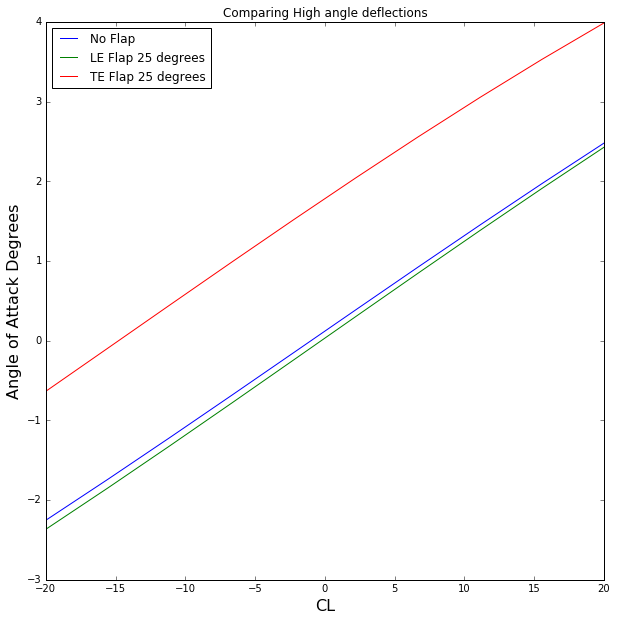

In [7]:
pyplot.figure(figsize=(10,10))
pyplot.plot(aa, CL_base, aa, CL_LE_25 , aa, CL_TE_25)
pyplot.legend(['No Flap', 'LE Flap 25 degrees', 'TE Flap 25 degrees'], loc='upper left')
pyplot.title('Comparing High angle deflections')
pyplot.xlabel('CL', fontsize=16)
pyplot.ylabel('Angle of Attack Degrees', fontsize=16)

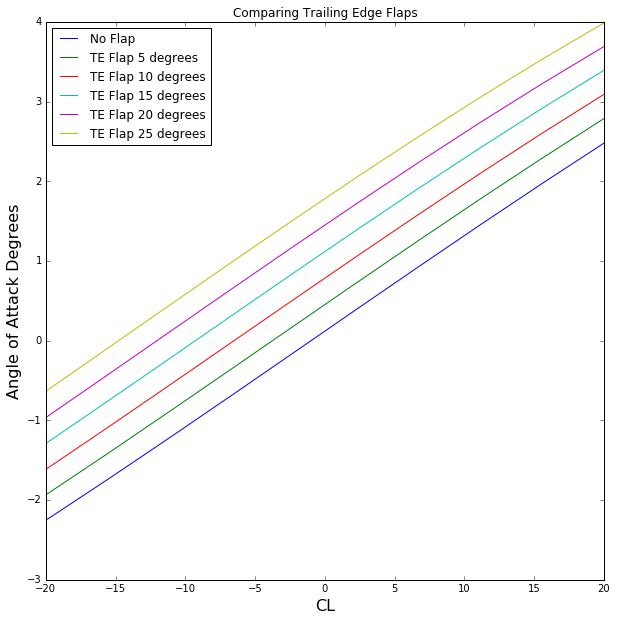

In [17]:
pyplot.figure(figsize=(10,10))
pyplot.plot(aa, CL_base, aa, CL_TE_5,aa, CL_TE_10,aa, CL_TE_15,aa, CL_TE_20,aa, CL_TE_25,)
pyplot.legend(['No Flap', 'TE Flap 5 degrees', 'TE Flap 10 degrees','TE Flap 15 degrees','TE Flap 20 degrees','TE Flap 25 degrees'], loc='upper left')
pyplot.title('Comparing Trailing Edge Flaps')
pyplot.xlabel('CL', fontsize=16)
pyplot.ylabel('Angle of Attack Degrees', fontsize=16)

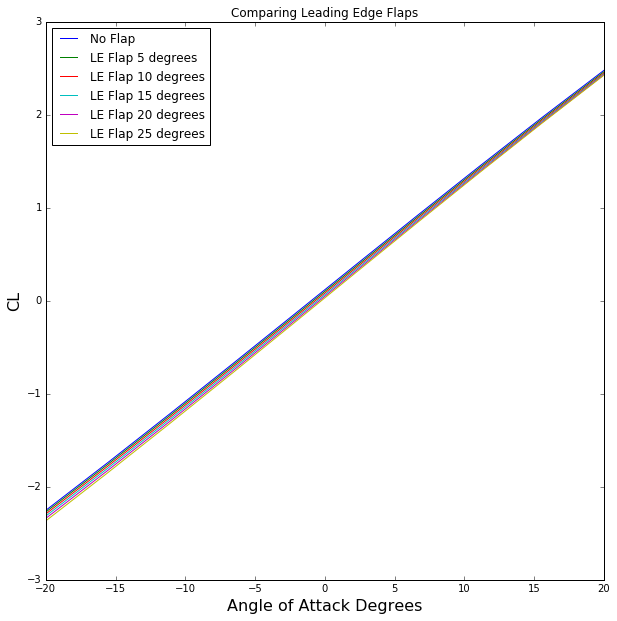

In [15]:
pyplot.figure(figsize=(10,10))
pyplot.plot(aa, CL_base, aa, CL_LE_5,aa, CL_LE_10,aa, CL_LE_15,aa, CL_LE_20,aa, CL_LE_25,)
pyplot.legend(['No Flap', 'LE Flap 5 degrees', 'LE Flap 10 degrees','LE Flap 15 degrees','LE Flap 20 degrees','LE Flap 25 degrees'], loc='upper left')
pyplot.title('Comparing Leading Edge Flaps')
pyplot.xlabel('Angle of Attack Degrees', fontsize=16)
pyplot.ylabel('CL', fontsize=16)

The three graphs show us a few things. Most readly apparent is that Leading Edge Flaps fail to achieve as much lift as Trailing Edge flaps. Leading Edge Flaps gain very little Lift as angle of delfection increases. Leading Edge Flaps gain a consistent amount lift per degree of deflection. Remember this was done using a simple potential flow solver which does not account for flow seperation or other boundry layer effects, this is also why we see linear plots for CL as opposed to the typical CL plots you would see for a realistic simulation, where stall would be visible.

## XFLR

The data collected in XFLR was done with a Type 1 Analyis, Reynolds # = 100,000 , Mach # = 0 , With Viscous and Initialize BL active. This model is not a potential flow model and thus will take into account Boundry Layer conditions and Speration of Flow. This Effects are apparent when you notice that a stall angle is detectable for each airfoil.  

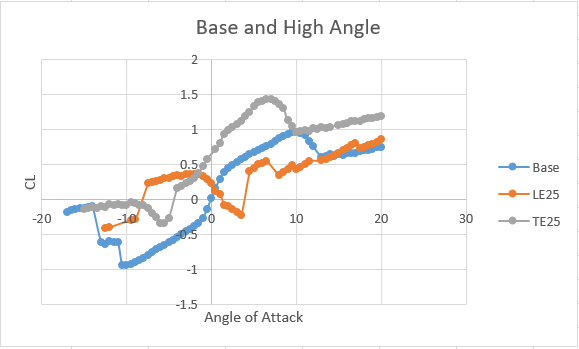

In [10]:
from IPython.core.display import Image 
Image(filename=r'XFLR DATA/Figure1.PNG')

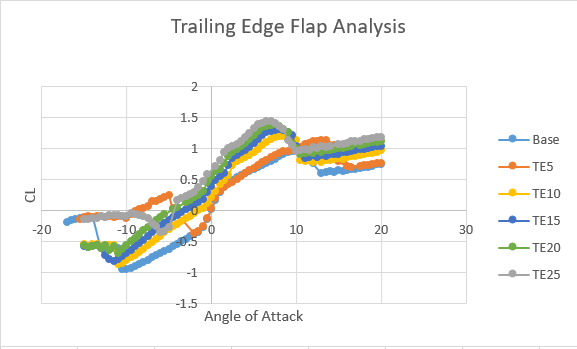

In [11]:
Image(filename=r'XFLR DATA/Figure2.PNG')

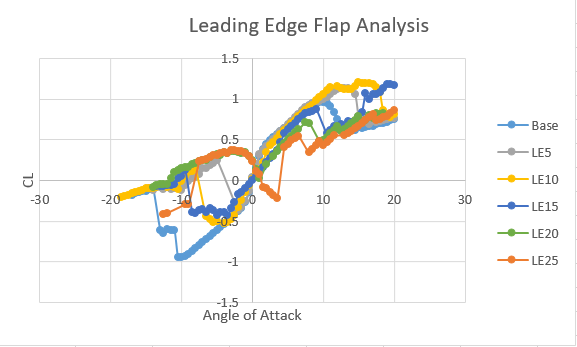

In [12]:
Image(filename=r'XFLR DATA/Figure3.PNG')

By looking at this data we see that our classes potential flow model works to rather closely match the more accurate viscous model at low angles of attack and deflection. Our classes model fails rather quickly with high angles of deflection with Leading Edge Flaps.

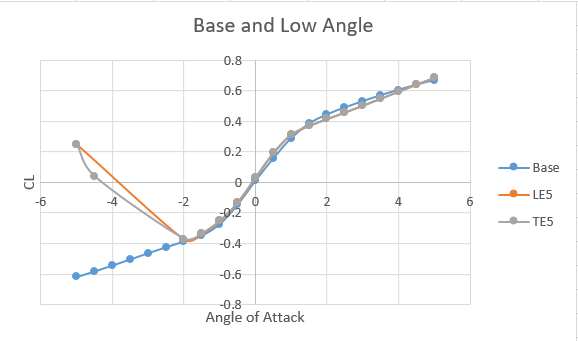

In [13]:
Image(filename=r'XFLR DATA/Figure4.PNG')

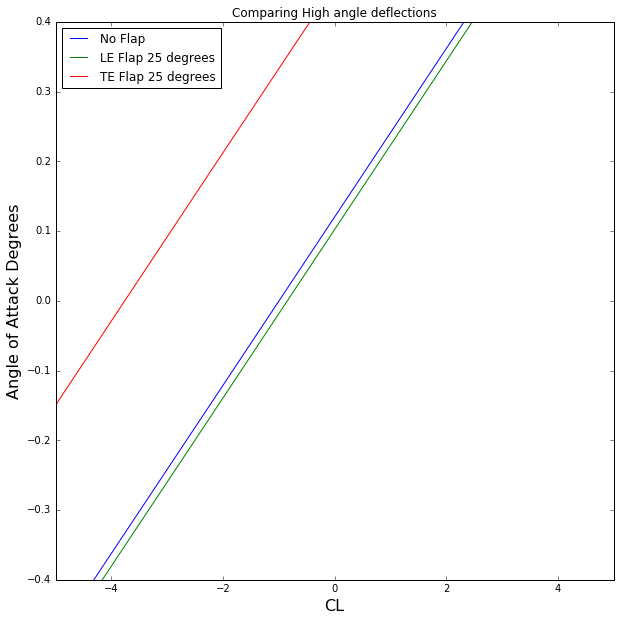

In [18]:
pyplot.figure(figsize=(10,10))
pyplot.plot(aa, CL_base, aa, CL_LE_5 , aa, CL_TE_5)
pyplot.legend(['No Flap', 'LE Flap 25 degrees', 'TE Flap 25 degrees'], loc='upper left')
pyplot.title('Comparing High angle deflections')
pyplot.xlabel('CL', fontsize=16)
pyplot.ylabel('Angle of Attack Degrees', fontsize=16)
pyplot.xlim(-5, 5);
pyplot.ylim(-.4, .4);

These last two graphs help to highlight my earlier point that at low angles of deflect and low angles of attack a potential flow model accurately predicts the lift of an airfoil.

## References 


In particular Lesson # 11
https://github.com/barbagroup/AeroPython/tree/master/lessons

This link demonstrates how to add flaps to airfoils in XFLR5
https://www.youtube.com/watch?v=xmalG5VS47g&list=PLtl5ylS6jdP6uOxzSJKPnUsvMbkmalfKg&index=4

This link was the inspiration for my 
https://globaljournals.org/GJRE_Volume13/2-Computational-Study-of-Flow.pdf
    